<a href="https://colab.research.google.com/github/atriap/atrria/blob/main/Bankruptcy_ROC_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Data Preparation

In [ ]:
df = pd.read_csv('b_data.csv')
df.shape

(6819, 14)

In [ ]:
# Check columns list and missing values
df.isnull().sum()

bankrupt                             0
roa                                  0
operating_gross_margin               0
current_ratio                        0
quick_ratio                          0
interest_expense_ratio               0
debt_ratio                           0
working_capital_to_assets            0
quick_asset_to_assets                0
current_asset_to_assets              0
cash_to_assets                       0
quick_assets_to_current_liability    0
cash_to_current_liability            0
current_liability_to_assets          0
dtype: int64

In [ ]:
# Get unique count for each variable
df.nunique()

bankrupt                                2
roa                                  3160
operating_gross_margin               3781
current_ratio                        6132
quick_ratio                          6094
interest_expense_ratio               3794
debt_ratio                           4208
working_capital_to_assets            6819
quick_asset_to_assets                6819
current_asset_to_assets              6819
cash_to_assets                       6819
quick_assets_to_current_liability    6818
cash_to_current_liability            6810
current_liability_to_assets          6819
dtype: int64

In [ ]:
df.head()

,bankrupt,roa,operating_gross_margin,current_ratio,quick_ratio,interest_expense_ratio,debt_ratio,working_capital_to_assets,quick_asset_to_assets,current_asset_to_assets,cash_to_assets,quick_assets_to_current_liability,cash_to_current_liability,current_liability_to_assets
0,1,0.405750,0.601457,0.002259,0.001208,0.629951,0.207576,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308
1,1,0.516730,0.610235,0.006016,0.004039,0.635172,0.171176,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963
2,1,0.472295,0.601450,0.011543,0.005348,0.629631,0.207516,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162
3,1,0.457733,0.583541,0.004194,0.002896,0.630228,0.151465,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715
4,1,0.522298,0.598783,0.006022,0.003727,0.636055,0.106509,0.751822,0.260330,0.358380,0.014161,0.004275,6.804640e-04,0.110195


In [ ]:
df.dtypes

bankrupt                               int64
roa                                  float64
operating_gross_margin               float64
current_ratio                        float64
quick_ratio                          float64
interest_expense_ratio               float64
debt_ratio                           float64
working_capital_to_assets            float64
quick_asset_to_assets                float64
current_asset_to_assets              float64
cash_to_assets                       float64
quick_assets_to_current_liability    float64
cash_to_current_liability            float64
current_liability_to_assets          float64
dtype: object

# Explanatory Data Analysis

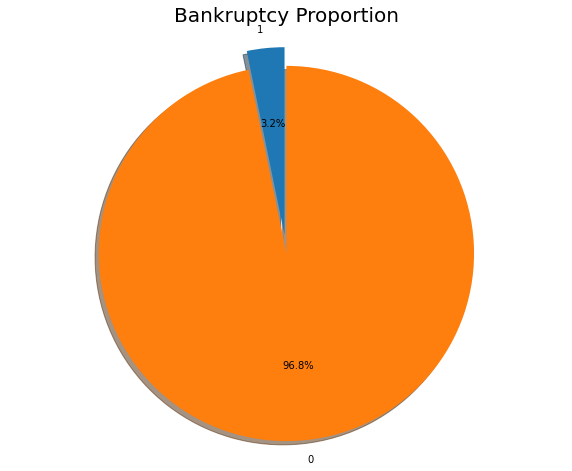

In [ ]:
labels = '1', '0'
sizes = [df.bankrupt[df['bankrupt']==1].count(), df.bankrupt[df['bankrupt']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Bankruptcy Proportion", size = 20)
plt.show()

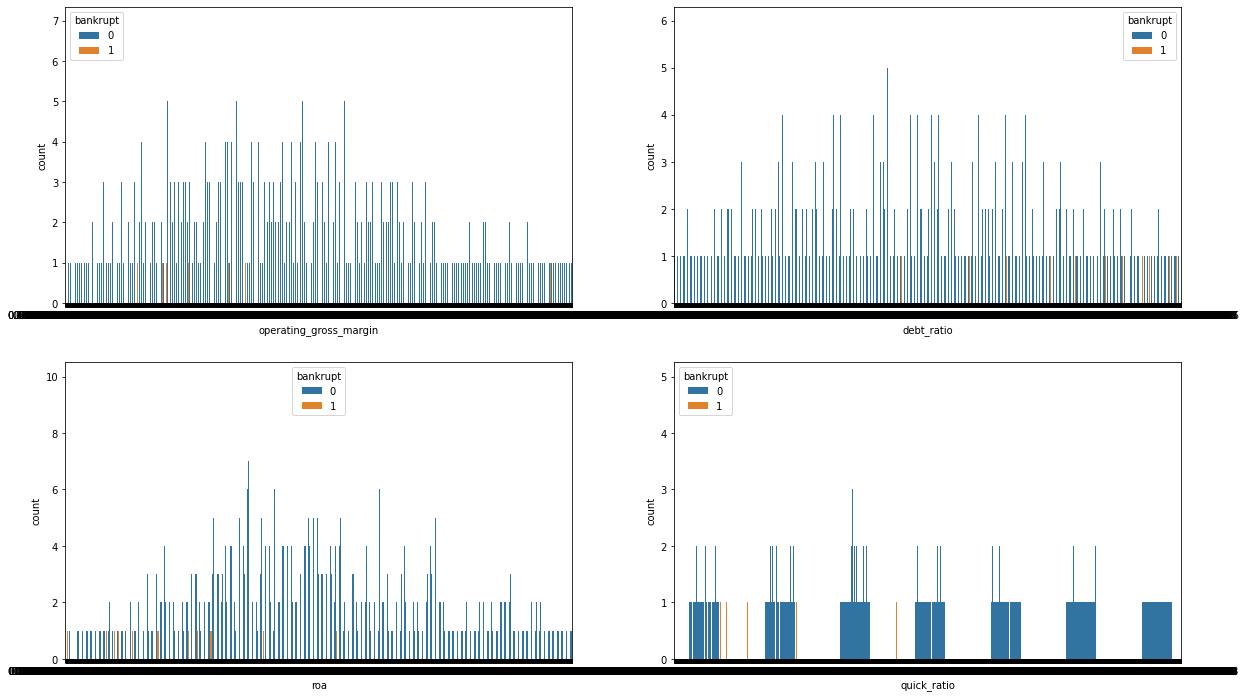

In [ ]:
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='operating_gross_margin', hue = 'bankrupt',data = df, ax=axarr[0][0])
    sns.countplot(x='debt_ratio', hue = 'bankrupt',data = df, ax=axarr[0][1])
    sns.countplot(x='roa', hue = 'bankrupt',data = df, ax=axarr[1][0])
    sns.countplot(x='quick_ratio', hue = 'bankrupt',data = df, ax=axarr[1][1])

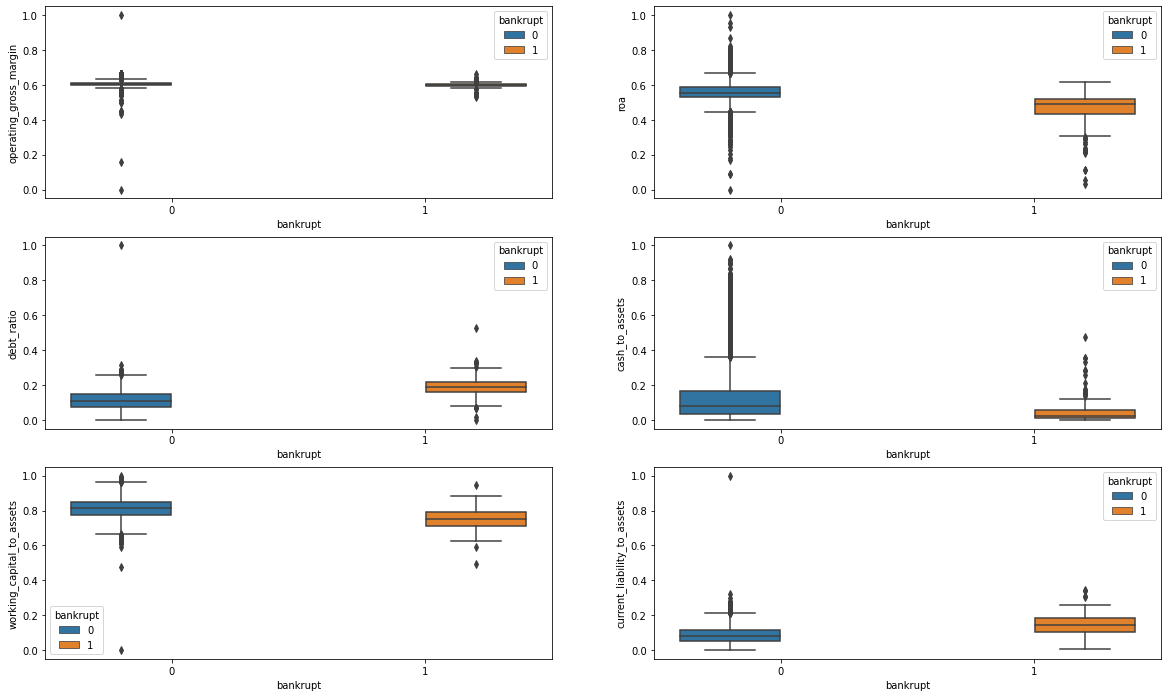

In [ ]:
    # Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='operating_gross_margin',x = 'bankrupt', hue = 'bankrupt',data = df, ax=axarr[0][0])
    sns.boxplot(y='roa',x = 'bankrupt', hue = 'bankrupt',data = df , ax=axarr[0][1])
    sns.boxplot(y='debt_ratio',x = 'bankrupt', hue = 'bankrupt',data = df, ax=axarr[1][0])
    sns.boxplot(y='cash_to_assets',x = 'bankrupt', hue = 'bankrupt',data = df, ax=axarr[1][1])
    sns.boxplot(y='working_capital_to_assets',x = 'bankrupt', hue = 'bankrupt',data = df, ax=axarr[2][0])
    sns.boxplot(y='current_liability_to_assets',x = 'bankrupt', hue = 'bankrupt',data = df, ax=axarr[2][1])

# Feature Engineering

In [ ]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

5455
1364


(0.0, 1.0)

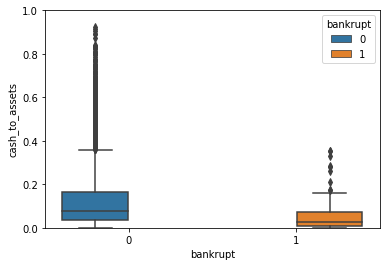

In [ ]:
df_train['cash_to_assets']
sns.boxplot(y='cash_to_assets',x = 'bankrupt', hue = 'bankrupt',data = df_train)
plt.ylim(0, 1)

In [ ]:
# New Data Frame
df_train.head()

,bankrupt,roa,operating_gross_margin,current_ratio,quick_ratio,interest_expense_ratio,debt_ratio,working_capital_to_assets,quick_asset_to_assets,current_asset_to_assets,cash_to_assets,quick_assets_to_current_liability,cash_to_current_liability,current_liability_to_assets
473,0,0.568178,0.621499,0.011855,0.006933,0.630951,0.078393,0.789311,0.189091,0.284409,0.065939,0.007685,0.007635,0.045454
6212,0,0.578564,0.609759,0.012415,0.009807,0.630662,0.081537,0.805324,0.322625,0.386253,0.105901,0.010057,0.009505,0.058774
4264,1,0.438086,0.609349,0.008250,0.005787,0.630184,0.190344,0.787303,0.499944,0.490401,0.040788,0.008191,0.001947,0.110956
1278,0,0.540393,0.596023,0.009957,0.002163,0.635096,0.153279,0.806102,0.168071,0.511473,0.055816,0.003161,0.003066,0.096352
2630,0,0.696183,0.643365,0.005842,0.005501,0.630802,0.114339,0.749673,0.179036,0.179763,0.111737,0.005710,0.010203,0.057760


# Data Preparation for Model Fitting

In [ ]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['roa',  'operating_gross_margin', 'current_ratio', 'quick_ratio','interest_expense_ratio', 'debt_ratio', 'working_capital_to_assets',
                   'quick_asset_to_assets', 'current_asset_to_assets', 'cash_to_assets', 'quick_assets_to_current_liability', 'cash_to_current_liability', 'current_liability_to_assets' ]
cat_vars = ['bankrupt']
df_train = df_train[['bankrupt'] + continuous_vars + cat_vars]
df_train.head()

,bankrupt,roa,operating_gross_margin,current_ratio,quick_ratio,interest_expense_ratio,debt_ratio,working_capital_to_assets,quick_asset_to_assets,current_asset_to_assets,cash_to_assets,quick_assets_to_current_liability,cash_to_current_liability,current_liability_to_assets,bankrupt
473,0,0.568178,0.621499,0.011855,0.006933,0.630951,0.078393,0.789311,0.189091,0.284409,0.065939,0.007685,0.007635,0.045454,0
6212,0,0.578564,0.609759,0.012415,0.009807,0.630662,0.081537,0.805324,0.322625,0.386253,0.105901,0.010057,0.009505,0.058774,0
4264,1,0.438086,0.609349,0.008250,0.005787,0.630184,0.190344,0.787303,0.499944,0.490401,0.040788,0.008191,0.001947,0.110956,1
1278,0,0.540393,0.596023,0.009957,0.002163,0.635096,0.153279,0.806102,0.168071,0.511473,0.055816,0.003161,0.003066,0.096352,0
2630,0,0.696183,0.643365,0.005842,0.005501,0.630802,0.114339,0.749673,0.179036,0.179763,0.111737,0.005710,0.010203,0.057760,0


In [ ]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,bankrupt,roa,operating_gross_margin,current_ratio,quick_ratio,interest_expense_ratio,debt_ratio,working_capital_to_assets,quick_asset_to_assets,current_asset_to_assets,cash_to_assets,quick_assets_to_current_liability,cash_to_current_liability,current_liability_to_assets,bankrupt
473,0,0.568178,0.934373,4.310751e-12,7.511093e-13,0.630951,0.078058,0.789311,0.189091,0.284409,0.071099,8.577482e-13,7.806965e-13,0.045454,0
6212,0,0.578564,0.916724,4.514523e-12,1.062556e-12,0.630662,0.081204,0.805324,0.322625,0.386253,0.114309,1.126652e-12,9.745217e-13,0.058774,0
4264,1,0.438086,0.916106,2.999849e-12,6.270171e-13,0.630184,0.190050,0.787303,0.499944,0.490401,0.043904,9.150956e-13,1.912672e-13,0.110956,1
1278,0,0.540393,0.896072,3.620695e-12,2.343288e-13,0.635096,0.152971,0.806102,0.168071,0.511473,0.060154,3.447465e-13,3.072209e-13,0.096352,0
2630,0,0.696183,0.967246,2.124401e-12,5.959940e-13,0.630802,0.114018,0.749673,0.179036,0.179763,0.120619,6.337532e-13,1.046895e-12,0.057760,0


# Model Fitting and Selection

In [ ]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

# Fit Best Models

In [ ]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=150, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='ovr',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'bankrupt'],df_train.bankrupt)

LogisticRegression(C=150, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [ ]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'bankrupt'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.bankrupt)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'bankrupt'],df_train.bankrupt)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'bankrupt'],df_train.bankrupt)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'bankrupt'],df_train.bankrupt)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

# Review best model fit accuracy  

In [ ]:
print(classification_report(df_train.bankrupt, log_primal.predict(df_train.loc[:, df_train.columns != 'bankrupt'])))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5283
           1       0.00      0.00      0.00       172

    accuracy                           0.97      5455
   macro avg       0.48      0.50      0.49      5455
weighted avg       0.94      0.97      0.95      5455



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(df_train.bankrupt,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5283
           1       0.00      0.00      0.00       172

    accuracy                           0.97      5455
   macro avg       0.48      0.50      0.49      5455
weighted avg       0.94      0.97      0.95      5455



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(df_train.bankrupt,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'bankrupt'])))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5283
           1       1.00      0.05      0.10       172

    accuracy                           0.97      5455
   macro avg       0.99      0.53      0.54      5455
weighted avg       0.97      0.97      0.96      5455



In [ ]:
print(classification_report(df_train.bankrupt,  RF.predict(df_train.loc[:, df_train.columns != 'bankrupt'])))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5283
           1       1.00      0.60      0.75       172

    accuracy                           0.99      5455
   macro avg       0.99      0.80      0.87      5455
weighted avg       0.99      0.99      0.99      5455



In [ ]:
print(classification_report(df_train.bankrupt,  XGB.predict(df_train.loc[:, df_train.columns != 'bankrupt'])))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5283
           1       0.89      0.37      0.52       172

    accuracy                           0.98      5455
   macro avg       0.93      0.69      0.76      5455
weighted avg       0.98      0.98      0.97      5455



## ROC CURVE

In [ ]:
y = df_train.bankrupt
X = df_train.loc[:, df_train.columns != 'bankrupt']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

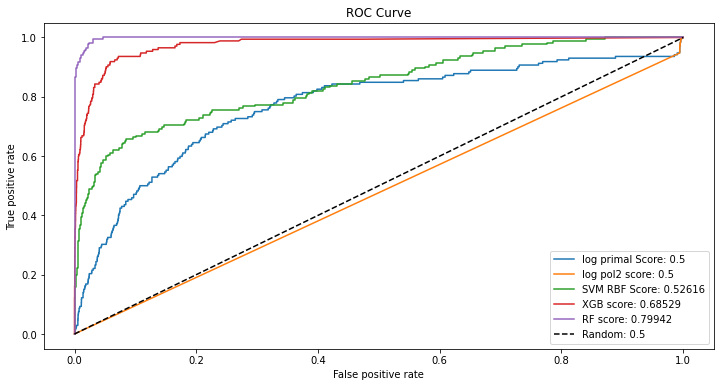

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

# Conclusion